# House Prices Model EDA

## General

### Imports

In [28]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import boxcox1p
from scripts.eda_plots import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [4]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [5]:
with open('./input/data_description.txt') as f:
    content = f.read()
    print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## EDA

Notes about variables
- Condition1 + Condition2 ?
- Years, MoSold shoud be strings
- Exterior1st + Exterior2nd ?
- Features like ExterQual, BsmtFinType1, Functional can be translated into 0-n scale
- infer from related features like Garage
- MiscFeature + MiscVal

In [6]:
df_all = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

In [7]:
pd.set_option('display.max_columns', 81)
df_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [8]:
# drop the 'Id' column since it's unnecessary for the prediction process
train_id = df_train['Id']
test_id = df_test['Id']

df_all.drop('Id', axis=1, inplace=True)

In [9]:
del df_train
del df_test

In [10]:
df_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
# check frequency of values per feature

for c in df_all.columns:
    vc = df_all[c].value_counts(dropna=False)
    vc_perc = df_all[c].value_counts(normalize=True, dropna=False)
    if vc_perc.iloc[0] > 0.95 and len(vc_perc) < 5:
        print(f"{vc}\n")

Pave    2907
Grvl      12
Name: Street, dtype: int64

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

NaN    2909
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64



In [12]:
# missing data

def missing_data(df):
    missing = round(
        (df.drop('SalePrice', axis=1).isnull().sum() / len(df)) * 100, 2)
    return missing[missing != 0].sort_values(ascending=False)


missing_data(df_all)

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
FireplaceQu     48.65
LotFrontage     16.65
GarageFinish     5.45
GarageYrBlt      5.45
GarageQual       5.45
GarageCond       5.45
GarageType       5.38
BsmtExposure     2.81
BsmtCond         2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
BsmtFullBath     0.07
BsmtHalfBath     0.07
Utilities        0.07
Functional       0.07
Exterior2nd      0.03
Exterior1st      0.03
SaleType         0.03
BsmtFinSF1       0.03
BsmtFinSF2       0.03
BsmtUnfSF        0.03
Electrical       0.03
KitchenQual      0.03
GarageCars       0.03
GarageArea       0.03
TotalBsmtSF      0.03
dtype: float64

In [13]:
# fill NaN based on info on data description

for c in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MSSubClass']:
    df_all[c].fillna('None', inplace=True)

df_all['Functional'].fillna('Typ', inplace=True)

In [14]:
# probably have no garage

for c in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_all[c].fillna('None', inplace=True)

for c in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df_all[c].fillna(0, inplace=True)

In [15]:
# probably have no basement

for c in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df_all[c].fillna('None', inplace=True)

for c in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df_all[c].fillna(0, inplace=True)

In [16]:
# probably have no masonry veneer

df_all['MasVnrType'].fillna('None', inplace=True)
df_all['MasVnrArea'].fillna(0, inplace=True)

In [17]:
# impute rest of missing values with most frequent
# for categorical and median for numerical

for c in ['LotFrontage', 'MSZoning', 'Electrical', 'KitchenQual',
          'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities']:
    if df_all[c].dtype == np.dtype('O'):
        df_all[c].fillna(df_all[c].mode()[0], inplace=True)
    elif (
        (df_all[c].dtype == np.dtype('float64')) |
        (df_all[c].dtype == np.dtype('int64'))
    ):
        df_all[c].fillna(df_all[c].median(), inplace=True)

In [19]:
# check missing data again
missing_data(df_all)

Series([], dtype: float64)

In [20]:
# combine year and month sold
df_all['YrMoSold'] = df_all['YrSold'] * 100 + df_all['MoSold']
df_all.drop(['YrSold', 'MoSold'], axis=1, inplace=True)

In [21]:
# transform years to numerical  TODO: or string?
cols_periodical = [c for c in df_all.columns if
                   'year' in c.lower() or
                   'yr' in c.lower() or
                   'mo' in c.lower()]

for c in cols_periodical:
    df_all[c] = df_all[c].astype(np.int64)

In [22]:
# the following features may provide information if treated as numerical
# rather than be dummified

cols_to_transform = df_all.loc[:, (df_all.isin(
    ['Ex', 'Gd', 'TA', 'Fa', 'Po',
     'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf']
)).any()].columns.tolist()

cols_to_transform.extend(['Functional'])

cols_to_transform_extra = [
    'LandSlope',
    'CentralAir',
    'Street',
    'LotShape',
    'MSSubClass',
    'Fence',
    'PavedDrive',
    'Alley',
    'OverallCond']

# process columns, apply LabelEncoder to categorical features
for c in cols_to_transform:
    lbl = LabelEncoder()
    lbl.fit(list(df_all[c].values))
    df_all[c] = lbl.transform(list(df_all[c].values))

In [23]:
# split columns to categorical and numerical
cols_categorical = [c for c in df_all.columns if
                    df_all[c].dtype == np.dtype('O')]

cols_numerical = [c for c in df_all.columns if
                  df_all[c].dtype == np.dtype('float64') or
                  df_all[c].dtype == np.dtype('int64')]


# split numerical columns to discrete and continuous
cols_num_discrete = [c for c in cols_numerical if
                     len(df_all[c].unique()) < 25 and
                     not 'area' in c.lower()]

cols_num_continuous = [c for c in cols_numerical if
                       c not in cols_num_discrete]

In [24]:
df_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,YrMoSold
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003,2,2.0,548.0,5,5,Y,0,61,0,0,0,0,3,None,None,0,WD,Normal,208500.0,200802
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976,2,2.0,460.0,5,5,Y,298,0,0,0,0,0,3,None,None,0,WD,Normal,181500.0,200705
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001,2,2.0,608.0,5,5,Y,0,42,0,0,0,0,3,None,None,0,WD,Normal,223500.0,200809
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998,3,3.0,642.0,5,5,Y,0,35,272,0,0,0,3,None,None,0,WD,Abnorml,140000.0,200602
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000,2,3.0,836.0,5,5,Y,192,84,0,0,0,0,3,None,None,0,WD,Normal,250000.0,200812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,6,0.0,6,0.0,546.0,546.0,GasA,2,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0,1,0.0,0.0,3,3,Y,0,0,0,0,0,0,3,None,None,0,WD,Normal,NaN,200606
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,4,CBlock,4,4,3,5,252.0,6,0.0,294.0,546.0,GasA,4,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,1970,3,1.0,286.0,5,5,Y,0,24,0,0,0,0,3,None,None,0,WD,Abnorml,NaN,200604
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,4,4,3,0,1224.0,6,0.0,0.0,1224.0,GasA,0,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,Detchd,1960,3,2.0,576.0,5,5,Y,474,0,0,0,0,0,3,None,None,0,WD,Abnorml,NaN,200609
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,4,PConc,2,4,0,2,337.0,6,0.0,575.0,912.0,GasA,4,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,3,None,0,1,0.0,0.0,3,3,Y,80,32,0,0

In [25]:
len(cols_categorical) + len(cols_num_continuous) + \
    len(cols_num_discrete) == len(df_all.columns)

True

In [26]:
sns.set_style('darkgrid')

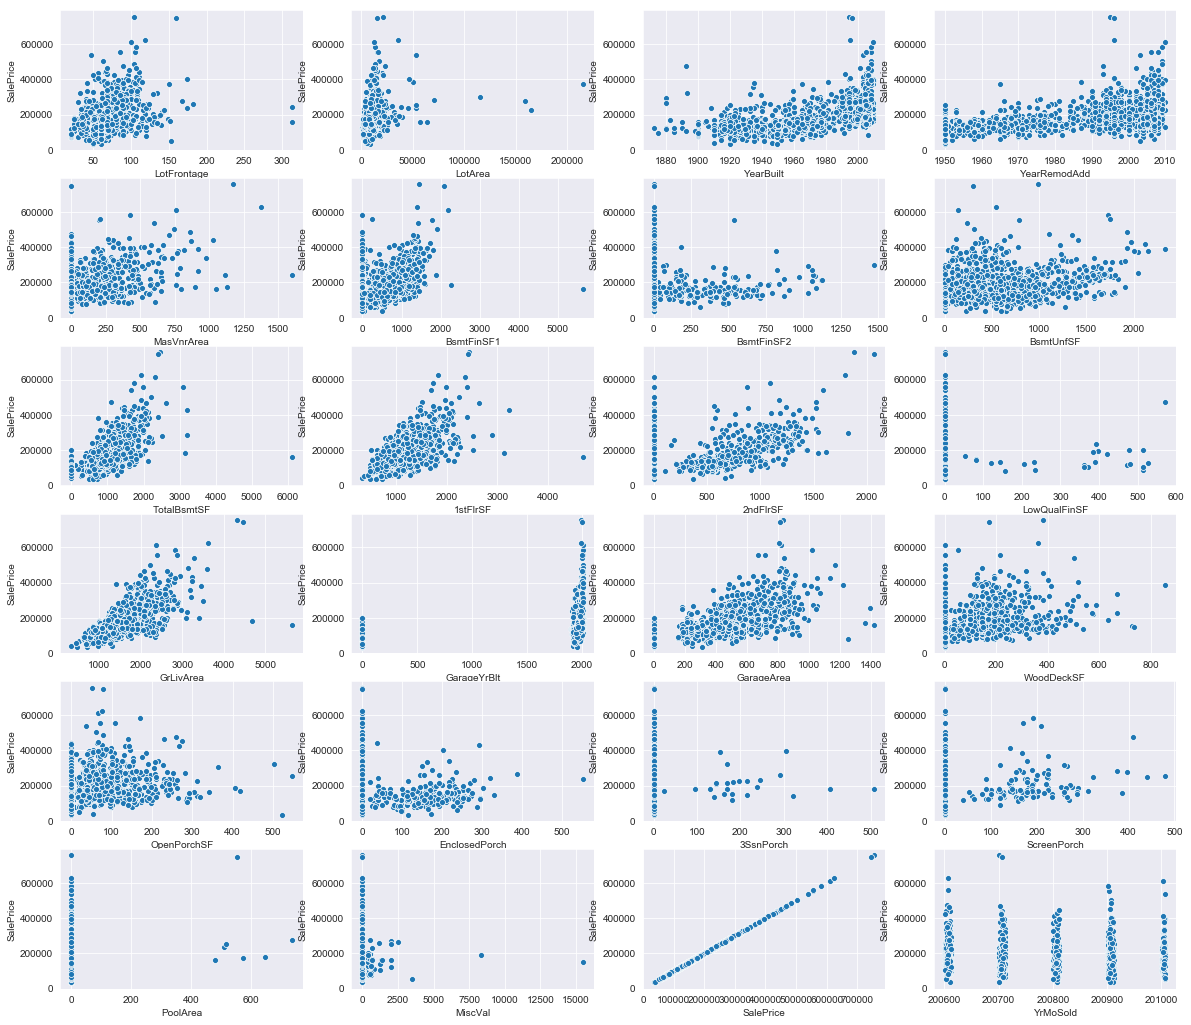

In [29]:
# visualize continuous features

scatter_grid(df_all, features_to_vis=cols_num_continuous,
             y='SalePrice')

In [30]:
# Drop 2 outliers with too large living area for relatively low price

idx1 = df_all['GrLivArea'] > 4000
idx2 = df_all['SalePrice'] < 300000
df_all.drop(df_all[idx1 & idx2].index, inplace=True)

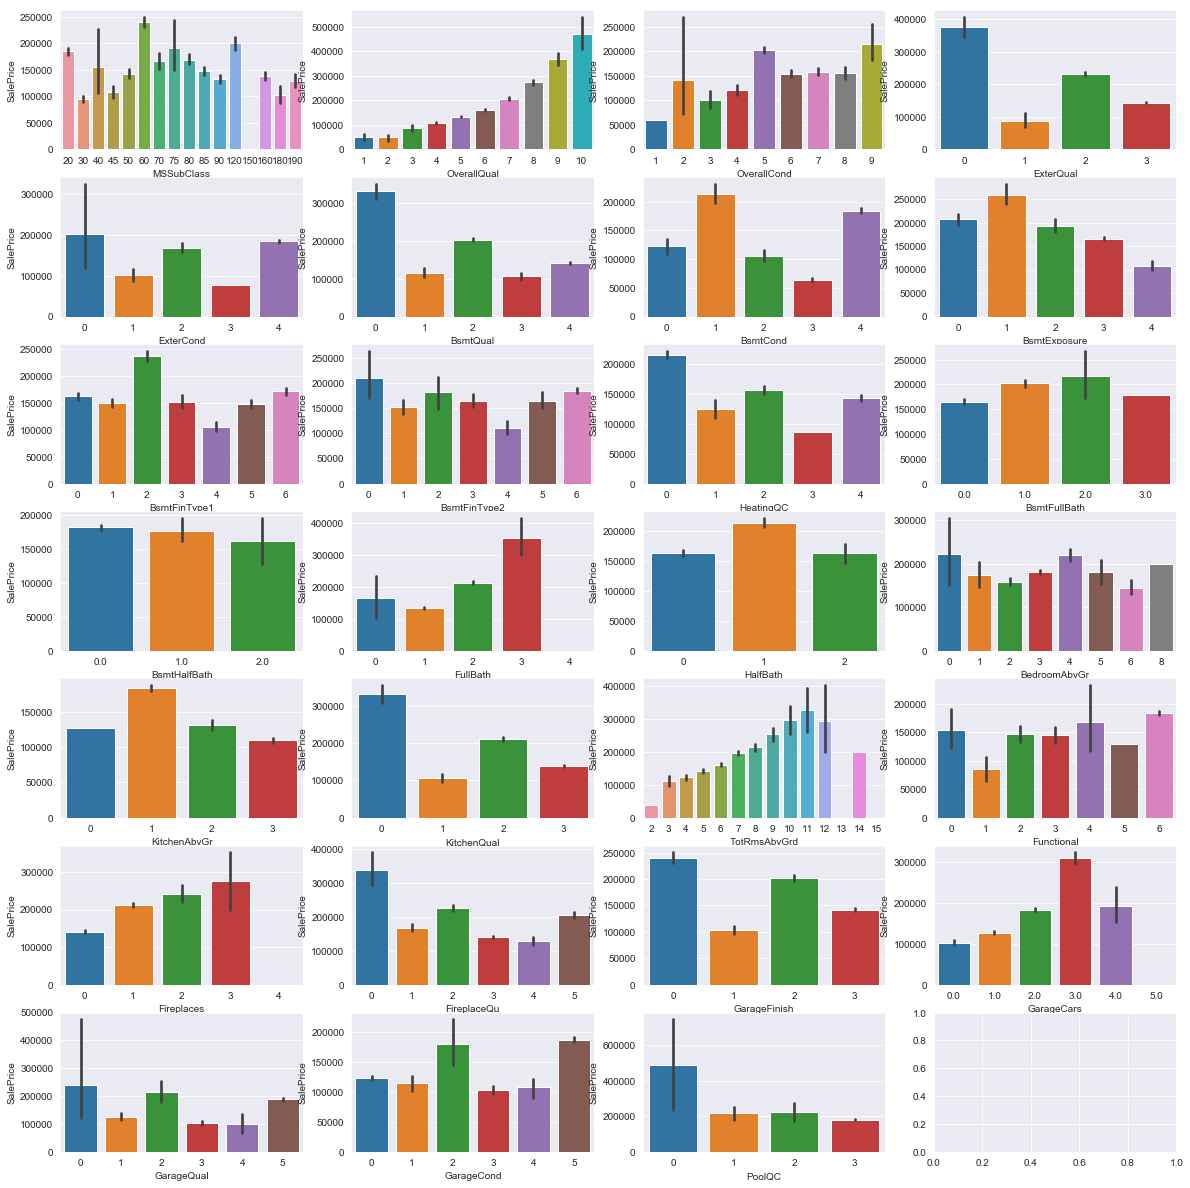

In [31]:
# visualize discrete features

barplot_grid(df_all, features_to_vis=cols_num_discrete,
             y='SalePrice')

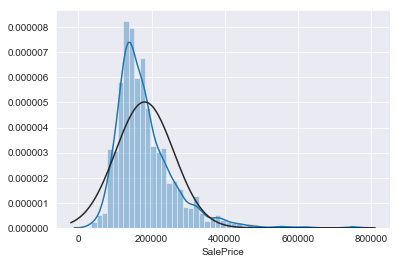

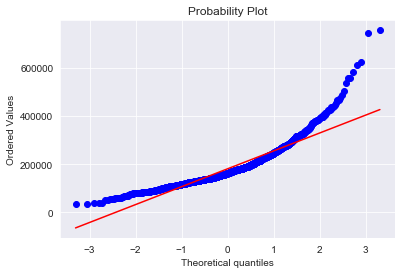

In [32]:
# histogram and normal probability plot of y

check_normality(df_all.loc[~df_all['SalePrice'].isna(), 'SalePrice'])

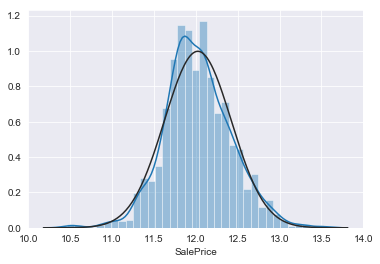

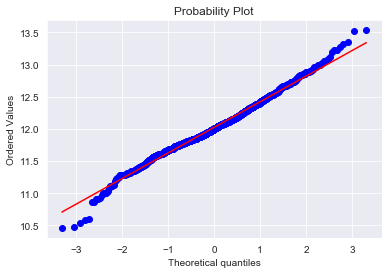

In [33]:
# applying log transformation

df_all['SalePrice'] = np.log1p(df_all['SalePrice'])

check_normality(df_all.loc[~df_all['SalePrice'].isna(), 'SalePrice'])

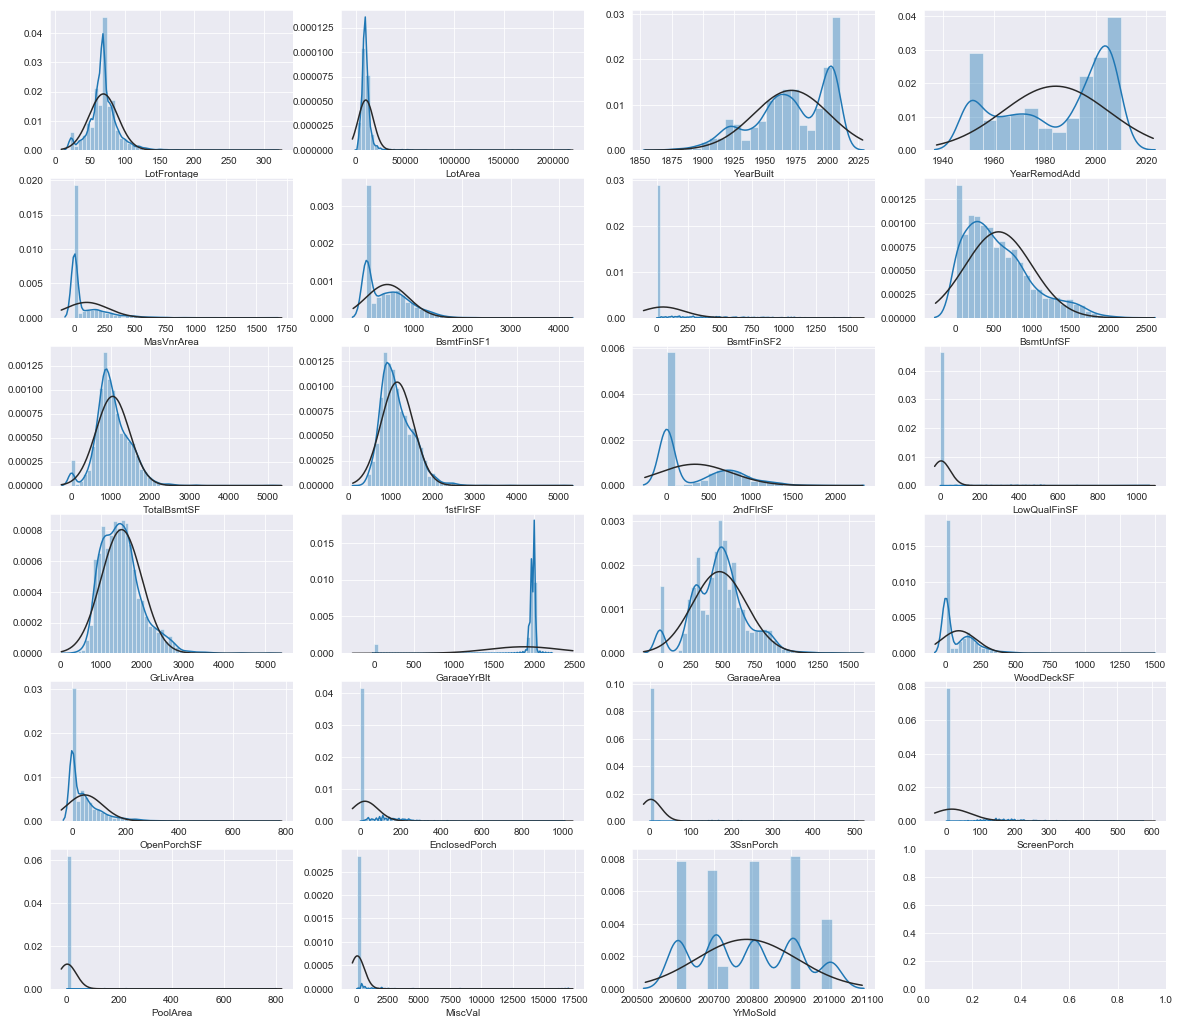

In [34]:
# histograms of X

distplot_grid(df_all, [c for c in cols_num_continuous if c != 'SalePrice'])

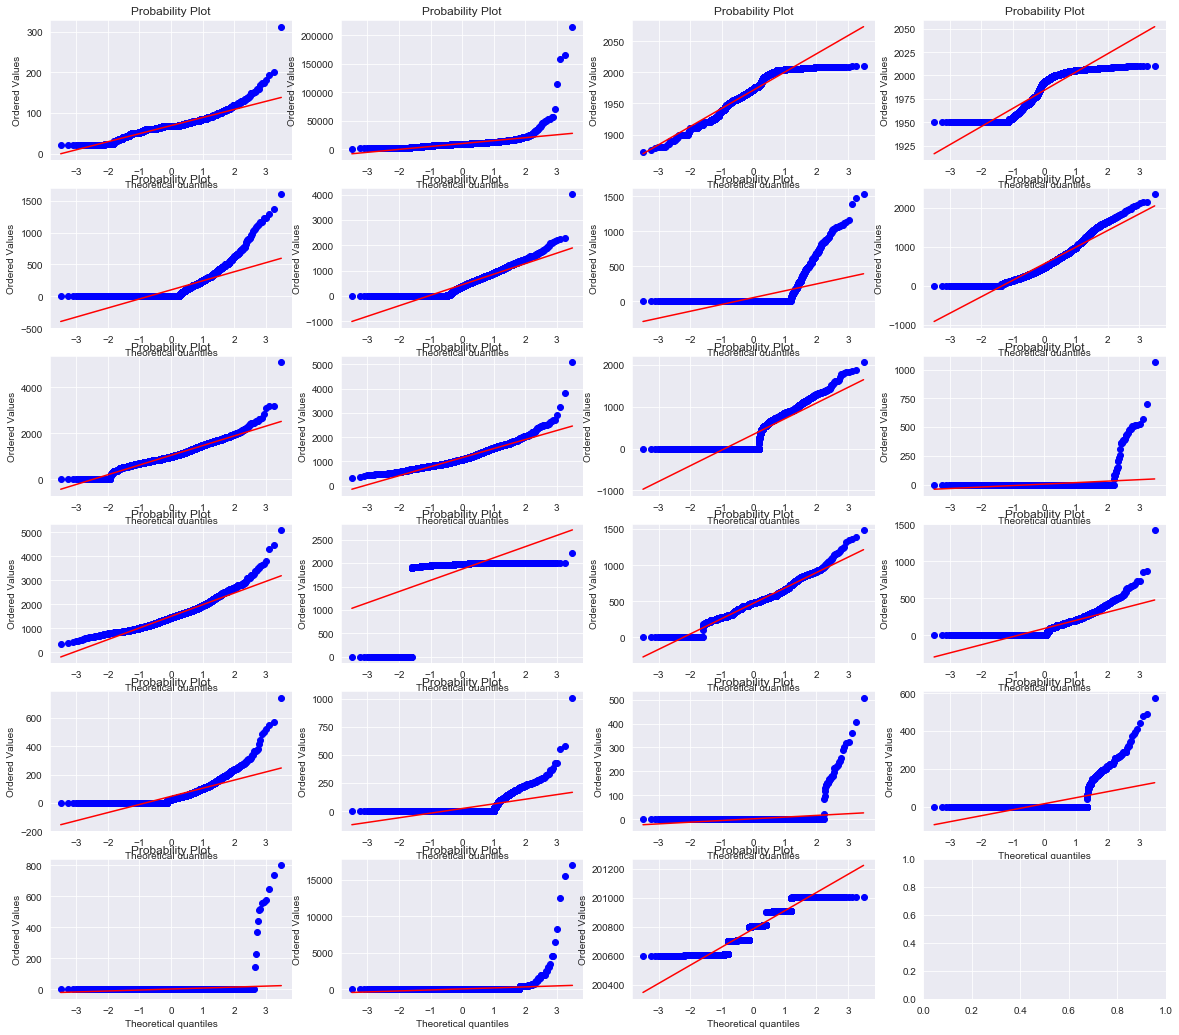

In [35]:
# normal probability plots of X

normplot_grid(df_all, [c for c in cols_num_continuous if c != 'SalePrice'])

In [36]:
# skewness of numerical features

df_all[cols_num_continuous+cols_num_discrete].skew().sort_values(ascending=False)

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
MasVnrArea        2.623068
OpenPorchSF       2.530660
WoodDeckSF        1.845741
MSSubClass        1.375838
1stFlrSF          1.257933
LotFrontage       1.256458
GrLivArea         1.069300
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
2ndFlrSF          0.861999
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
HalfBath          0.697024
TotalBsmtSF       0.672097
BsmtFullBath      0.622735
OverallCond       0.569607
HeatingQC         0.485784
FireplaceQu       0.332782
BedroomAbvGr      0.326736
GarageArea        0.216968
OverallQual       0.189688
FullBath          0.165599
YrMoSold          0.123280
SalePrice         0.121580
BsmtFinType1      0.083684
GarageCars       -0.219410
YearRemodAdd     -0.450365
B

In [37]:
lmbda = 0.2  # TODO check

In [38]:
cols_to_boxcox_trans = [c for c in cols_num_continuous if c != 'SalePrice']

df_all[cols_to_boxcox_trans] = df_all[cols_to_boxcox_trans].apply(
    lambda x: boxcox1p(x, lmbda))

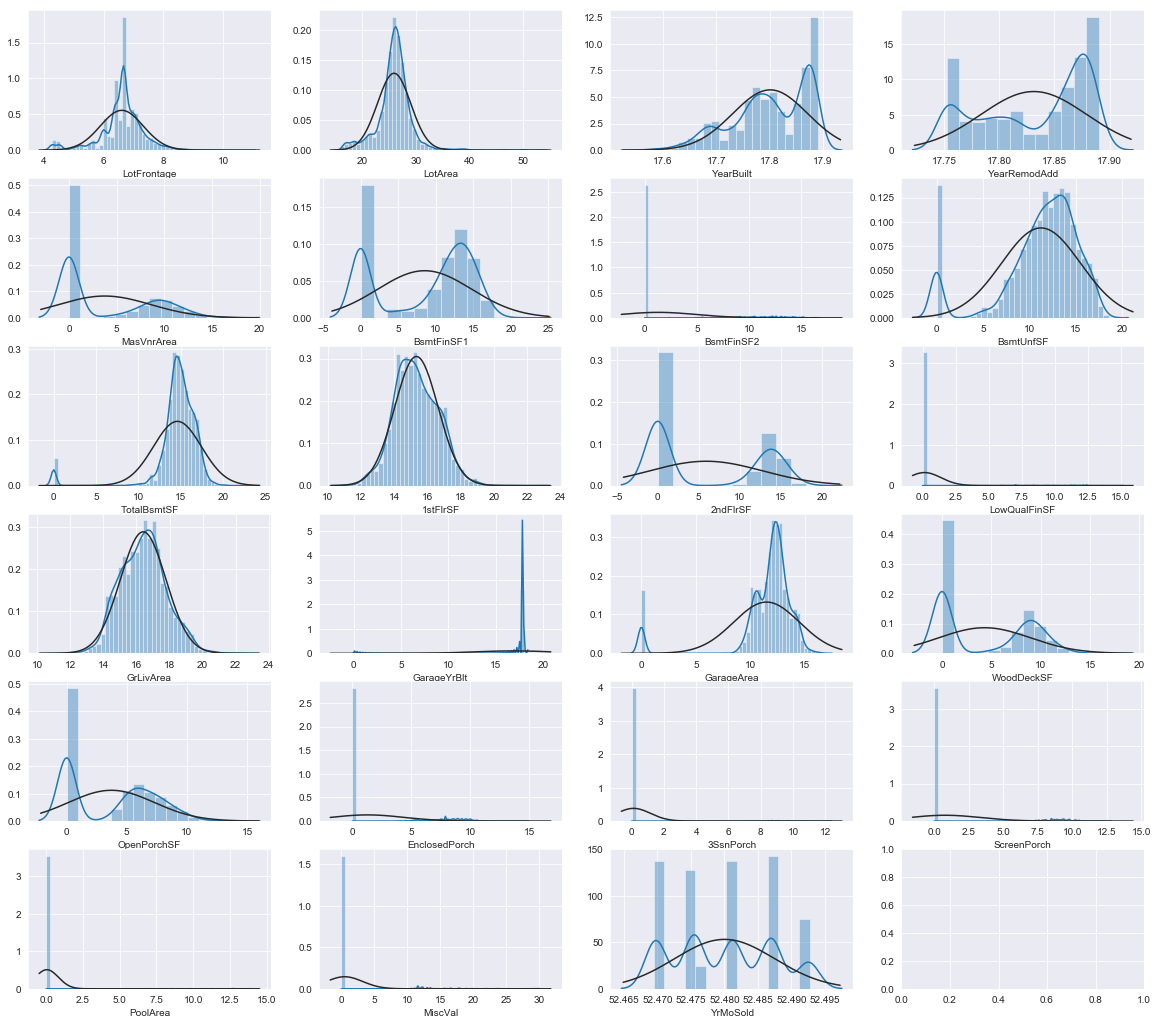

In [39]:
distplot_grid(df_all, [c for c in cols_num_continuous if c != 'SalePrice'])

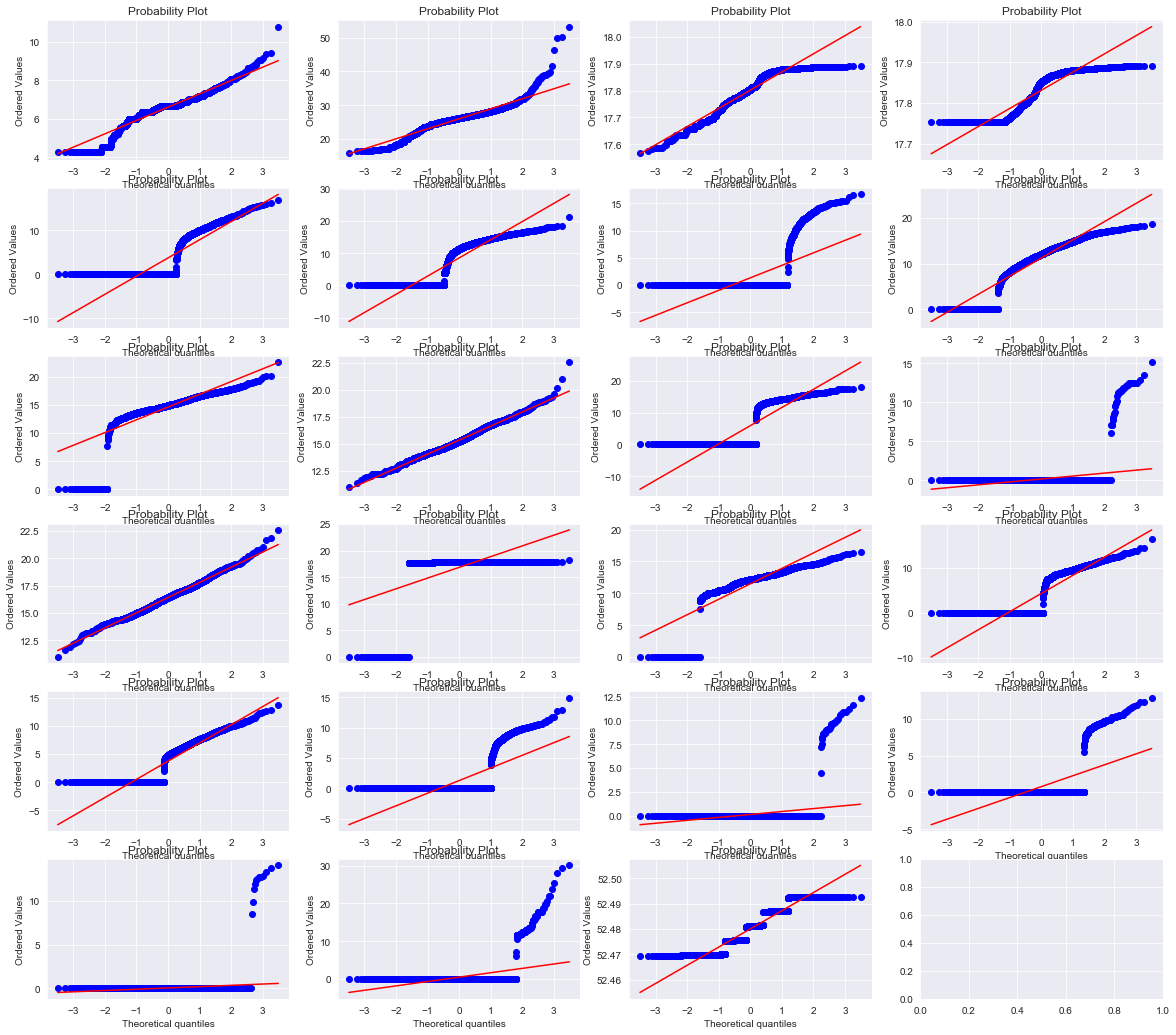

In [40]:
normplot_grid(df_all, [c for c in cols_num_continuous if c != 'SalePrice'])

In [41]:
df_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,YrMoSold
0,60,RL,6.557896,25.503637,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17.874391,17.874391,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.383456,2,4,PConc,2,4,3,2,13.571795,6,0.0,8.638462,14.300394,GasA,0,Y,SBrkr,14.300394,14.291377,0.0,17.162564,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,17.874391,2,2.0,12.655681,5,5,Y,0.000000,6.414275,0.000000,0.0,0.0,0.0,3,None,None,0.000000,WD,Normal,12.247699,52.480964
1,20,RL,7.041123,26.291998,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,17.812419,17.812419,Gable,CompShg,MetalSd,MetalSd,None,0.000000,3,4,CBlock,2,4,1,0,14.821045,6,0.0,10.485990,15.856944,GasA,0,Y,SBrkr,15.856944,0.000000,0.0,15.856944,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,17.812419,2,2.0,12.049443,5,5,Y,10.635229,0.000000,0.000000,0.0,0.0,0.0,3,None,None,0.000000,WD,Normal,12.109016,52.475410
2,60,RL,6.661108,27.300424,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17.869824,17.872108,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.848653,2,4,PConc,2,4,2,2,12.237560,6,0.0,11.852637,14.580417,GasA,0,Y,SBrkr,14.580417,14.345227,0.0,17.356042,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,17.869824,2,2.0,13.025755,5,5,Y,0.000000,5.608737,0.000000,0.0,0.0,0.0,3,None,None,0.000000,WD,Normal,12.317171,52.481365
3,70,RL,6.377215,26.259338,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,17.669874,17.798555,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,3,4,BrkTil,4,1,3,0,9.664321,6,0.0,12.603923,13.827349,GasA,2,Y,SBrkr,14.751724,13.827349,0.0,17.180669,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,17.862966,3,3.0,13.222678,5,5,Y,0.000000,5.238363,10.353328,0.0,0.0,0.0,3,None,None,0.000000,WD,Abnorml,11.849405,52.469509
4,60,RL,7.157766,28.868815,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,17.867539,17.867539,Gable,CompShg,VinylSd,VinylSd,BrkFace,11.144754,2,4,PConc,2,4,0,2,13.295773,6,0.0,12.265784,15.455351,GasA,0,Y,SBrkr,15.455351,15.115838,0.0,18.303173,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,17.867539,2,3.0,14.209457,5,5,Y,9.324566,7.157766,0.000000,0.0,0.0,0.0,3,None,None,0.000000,WD,Normal,12.429220,52.481537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,4.278004,17.719351,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,17.798555,17.798555,Gable,CompShg,CemntBd,CmentBd,None,0.000000,3,4,CBlock,4,4,3,6,0.000000,6,0.0,12.642798,12.642798,GasA,2,Y,SBrkr,12.642798,12.642798,0.0,15.262547,0.0,0.0,1,1,3,1,3,5,6,0,3,None,0.000000,1,0.0,0.000000,3,3,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,3,None,None,0.000000,WD,Normal,NaN,52.469738
2915,160,RM,4.278004,17.619961,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,17.798555,17.798555,Gable,CompShg,CemntBd,CmentBd,None,0.000000,3,4,CBlock,4,4,3,5,10.121473,6,0.0,10.593170,12.642798,GasA,4,Y,SBrkr,12.642798,12.642798,0.0,15.262547,0.0,0.0,1,1,3,1,3,6,6,0,3,CarPort,17.798555,3

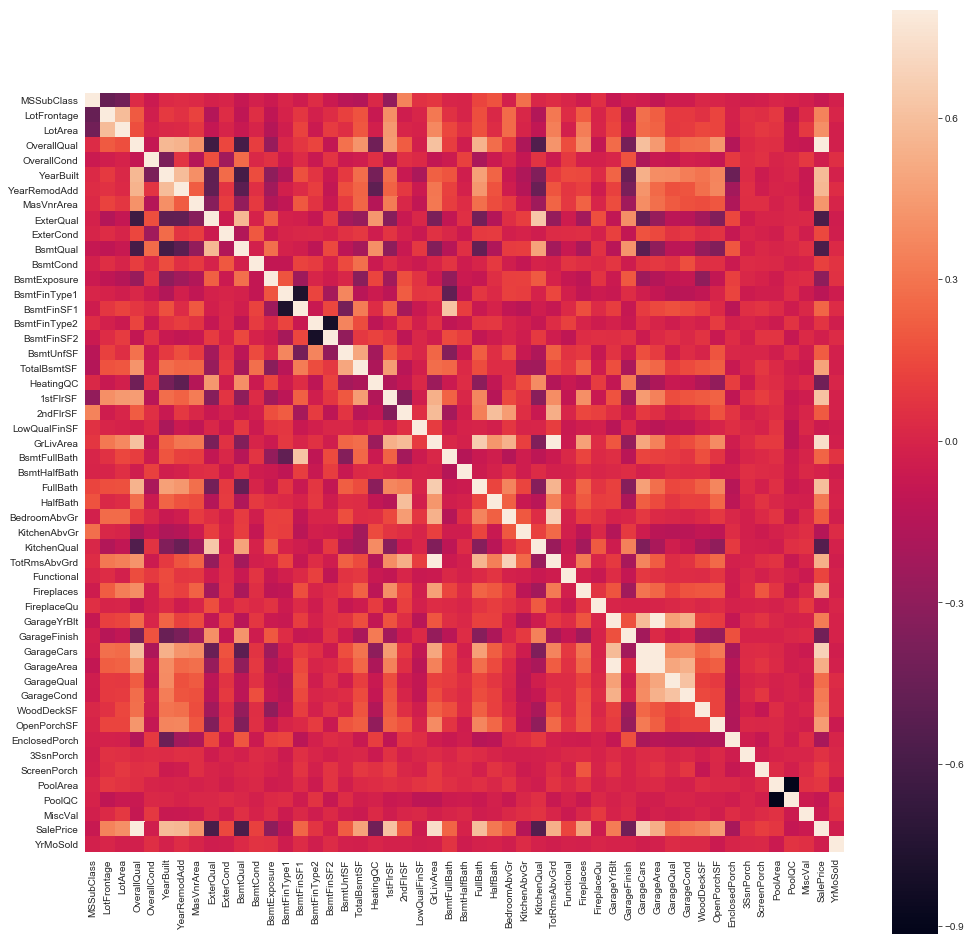

In [42]:
# correlation matrix

corrmat = df_all[~df_all['SalePrice'].isna()].corr()
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(corrmat, vmax=.8, square=True);

In [43]:
print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [44]:
# highly correlated

# Bsmtfintype1-bsmtfinsf1

# Bsmtfintype2-bsmtfinsf2

# poolarea-poolqc

# garagearea-garagecars -? keep only cars since higher corr with y

# totroomsabvgrnd-grlivarea

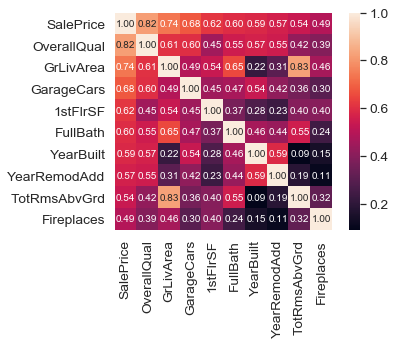

In [47]:
# saleprice correlation matrix

k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_all[~df_all['SalePrice'].isna()][cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

In [45]:
# drop highly correlated features to avoid multicollinearity

df_all.drop('GarageArea', axis=1, inplace=True)

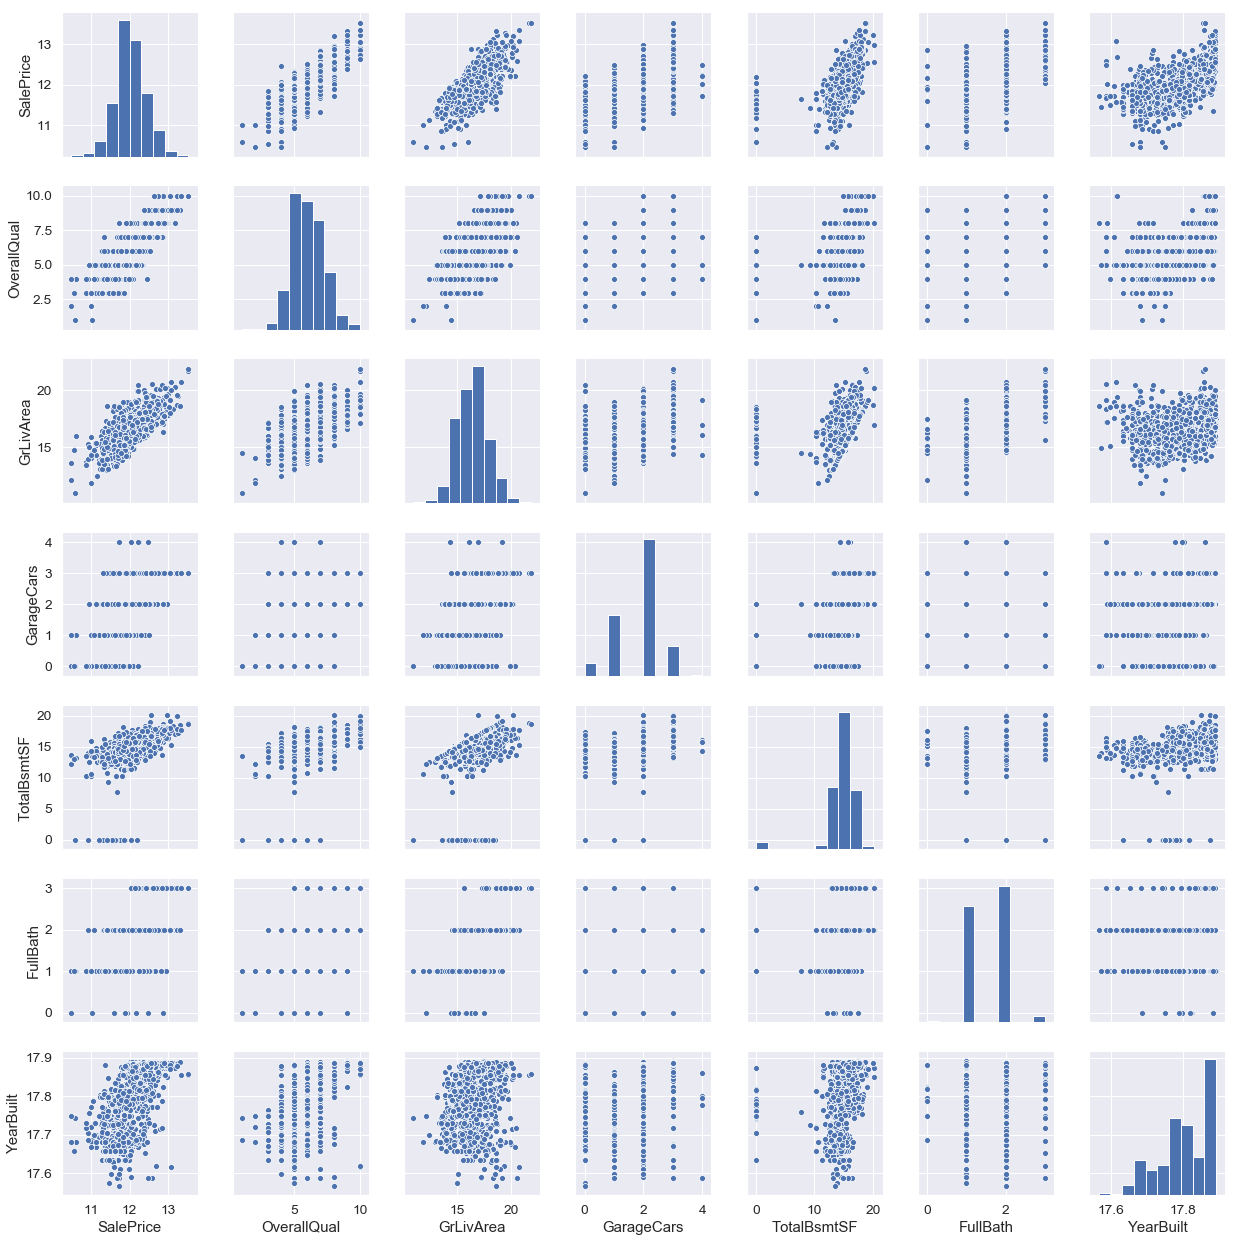

In [48]:
# scatterplot

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_all[~df_all['SalePrice'].isna()][cols], height = 2.5)
plt.show();

In [49]:
# get dummies for categorical variables

df_all = pd.get_dummies(df_all, columns=cols_categorical)

In [50]:
df_all

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,6.557896,25.503637,7,5,17.874391,17.874391,9.383456,2,4,2,4,3,2,13.571795,6,0.0,8.638462,14.300394,0,14.300394,14.291377,0.0,17.162564,1.0,0.0,2,1,3,1,2,8,6,0,3,17.874391,2,2.0,5,5,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,7.041123,26.291998,6,8,17.812419,17.812419,0.000000,3,4,2,4,1,0,14.821045,6,0.0,10.485990,15.856944,0,15.856944,0.000000,0.0,15.856944,0.0,1.0,2,0,3,1,3,6,6,1,5,17.812419,2,2.0,5,5,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,6.661108,27.300424,7,5,17.869824,17.872108,8.848653,2,4,2,4,2,2,12.237560,6,0.0,11.852637,14.580417,0,14.580417,14.345227,0.0,17.356042,1.0,0.0,2,1,3,1,2,6,6,1,5,17.869824,2,2.0,5,5,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,6.377215,26.259338,7,5,17.669874,17.798555,0.000000,3,4,4,1,3,0,9.664321,6,0.0,12.603923,13.827349,2,14.751724,13.827349,0.0,17.180669,1.0,0.0,1,0,3,1,2,7,6,1,2,17.862966,3,3.0,5,5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,7.157766,28.868815,8,5,17.867539,17.867539,11.144754,2,4,2,4,0,2,13.295773,6,0.0,12.265784,15.455351,0,15.455351,15.115838,0.0,18.303173,1.0,0.0,2,1,4,1,2,9,6,1,5,17.867539,2,3.0,5,5,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4.278004,17.719351,4,7,17.798555,17.798555,0.000000,3,4,4,4,3,6,0.000000,6,0.0,12.642798,12.642798,2,12.642798,12.642798,0.0,15.262547,0.0,0.0,1,1,3,1,3,5,6,0,3,0.000000,1,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2915,160,4.278004,17.619961,4,5,17.798555,17.798555,0.000000,3,4,4,4,3,5,10.121473,6,0.0,10.593170,12.642798,4,12.642798,12.642798,0.0,15.262547,0.0,0.0,1,1,3,1,3,6,6,0,3,17.798555,3,1.0,5,5,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2916,20,8.814500,31.239346,5,7,17.775374,17.858389,0.000000,3,4,4,4,3,0,15.729901,6,0.0,0.000000,15.729901,0,15.729901,0.000000,0.0,15.729901,1.0,0.0,1,0,4,1,3,7,6,1,5,17.775374,3,2.0,5,5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2917,85,6.450860,26.821947,5,5,17.849224,17.849224,0.000000,3,4,2,4,0,2,11.023351,6,0.0,12.826025,14.546282,4,14.788544,0.000000,0.0,14.788544,0.0,1.0,1,0,3,1,3,6,6,0,3,0.000000,1,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [51]:
# split dataset again

X_train = df_all[~df_all['SalePrice'].isna()].drop('SalePrice', axis=1)
y_train = df_all.loc[~df_all['SalePrice'].isna(), 'SalePrice']
X_test = df_all[df_all['SalePrice'].isna()].drop('SalePrice', axis=1)

print(f"shape X_train: {X_train.shape}\n"
      f"shape y_train: {y_train.shape}\n"
      f"shape X_test: {X_test.shape}\n")

shape X_train: (1458, 234)
shape y_train: (1458,)
shape X_test: (1459, 234)



In [52]:
# export

X_train.to_csv("./processed_dataset/X_train.csv", index=False, header=True)
y_train.to_csv("./processed_dataset/y_train.csv", index=False, header=True)
X_test.to_csv("./processed_dataset/X_test.csv", index=False, header=True)